In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# More Advanced Visualizations

This chapter shall discuss some more advanced visualization techniques. Let us begin by loading a World Bank dataset on education.

In [2]:
wb_df = pd.read_csv('data/world_bank.csv').drop(columns={'Unnamed: 0'})
wb_df

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
4,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,S. America,Guyana,87.0,81.0,NaN,NaN,92.0,94.0,82.0,87.0,...,76.0,84.0,99.0,95.0,84.0,29.0,7.4,7.4,69.0,80.0
162,S. America,Paraguay,89.0,90.0,71.0,77.0,99.0,98.0,96.0,94.0,...,52.0,89.0,83.0,93.0,NaN,NaN,NaN,NaN,71.0,87.0
163,S. America,Peru,99.0,100.0,84.0,87.0,99.0,99.0,97.0,90.0,...,53.0,76.0,92.0,90.0,60.0,57.0,NaN,NaN,87.0,80.0
164,S. America,Suriname,90.0,99.0,36.0,65.0,98.0,99.0,95.0,94.0,...,NaN,79.0,94.0,89.0,76.0,61.0,43.4,0.0,77.0,80.0


## Transformations

It is very advantageous for us to have linear data, simply because linear lines are easy to interpret. Given a linear line, you can say easily interpret the slope as saying that 'a 1 unit increase in the x-variable corresponds to a m-unit in the y-variable', and you can interpret the intercept as saying 'when the x-variable is 0, the y-variable is c'. However, we often have to work with data that doesn't appear to be linear.

Sometimes, when some data appears to not be linear, we can actually transform it so it has a linear relationship. For example, we plot the country's gross national income (GNI) per capita vs their male adult literacy rate, and the plot does not appear linear at all.

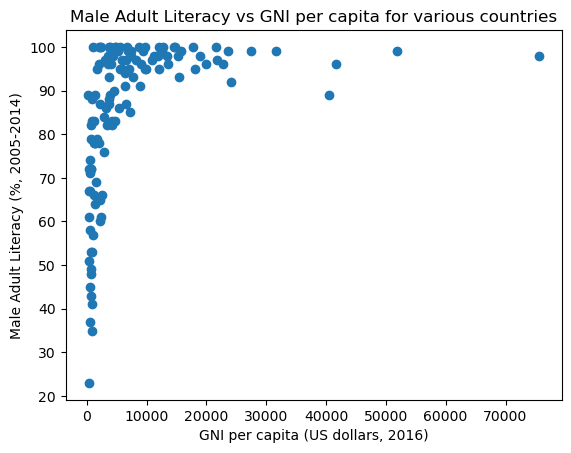

In [19]:
plt.scatter(wb_df['Gross national income per capita, Atlas method: $: 2016'],
            wb_df["Adult literacy rate: Male: % ages 15 and older: 2005-14"]);
plt.title('Male Adult Literacy vs GNI per capita for various countries')
plt.xlabel('GNI per capita (US dollars, 2016)')
plt.ylabel('Male Adult Literacy (%, 2005-2014)');

However, let us try to take the natural log of the GNI per capita and raise the male adult literacy rate to the 4th power.

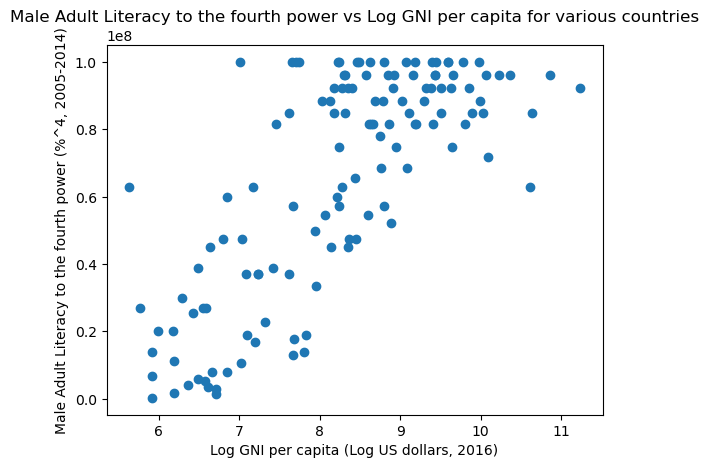

In [32]:
plt.scatter(np.log(wb_df['Gross national income per capita, Atlas method: $: 2016']),
            (wb_df["Adult literacy rate: Male: % ages 15 and older: 2005-14"])**4);
plt.title('Male Adult Literacy to the fourth power vs Log GNI per capita for various countries')
plt.xlabel('Log GNI per capita (Log US dollars, 2016)')
plt.ylabel('Male Adult Literacy to the fourth power (%^4, 2005-2014)');

This graph looks a lot more linear! We can even draw a line of best fit. Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) takes in two columns from a DataFrame and plots them, along with a line of best fit and the confidence interval for the line of best fit. So, in the code below, we add in two columns with the transformed variables into the original DataFrame and then we plot them.

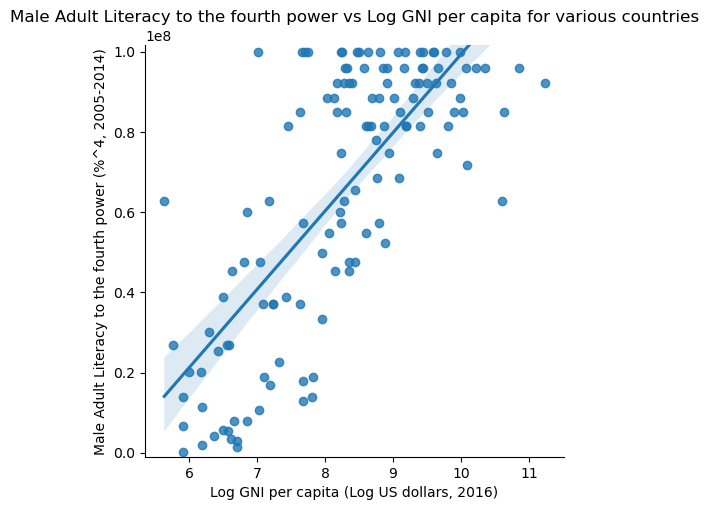

In [49]:
wb_df['log_gni'] = np.log(wb_df['Gross national income per capita, Atlas method: $: 2016'])
wb_df['male adult literacy ** 4'] = (wb_df["Adult literacy rate: Male: % ages 15 and older: 2005-14"])**4
sns.lmplot(x='log_gni', y='male adult literacy ** 4', data = wb_df);
plt.title('Male Adult Literacy to the fourth power vs Log GNI per capita for various countries')
plt.xlabel('Log GNI per capita (Log US dollars, 2016)')
plt.ylabel('Male Adult Literacy to the fourth power (%^4, 2005-2014)')
plt.ylim(-10**6,10.02**8);

This looks great! However, we made a logical leap there by knowing to take the log of the x-variable and raise the y-variable to the fourth power. How did we know to do this?

Well, the honest answer is practice. Lots and lots of practice. However, there are helpful guides which can help you. For example, there is the Tukey-Mosteller Bulge Diagram, as shown below.



### Tukey-Mosteller Bulge Diagram

![](assets/tukey_mosteller.png)

In the diagram above, each curve represents a direction that your data can trend in. For example, our original adult literacy vs GNI graph was trending towards the top left, corresponding to the top-left of the Tukey-Mosteller diagram. Looking at the top left curve, we can see that it is surrounded by several suggestions, namely $\log{X}, \sqrt{X}, Y^2$ and $Y^3$. Looking at the pattern, it seems like we want to transform the x-axis to increase slower and/or transform the y-axis to increase faster. From there, we can trial and error a bunch of different transformations until we find something that works! Note that we don't have to use both a x-axis and a y-axis transformation, a lot of times just a single transformation is enough!

### Kernel Density Estimation